Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum   
number of clusters.   
Draw the inferences from the clusters obtained.  

Data Description:  
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each  
passenger the data include information on their mileage history and on different ways they accrued or spent miles in   
the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the  
purpose of targeting different segments for different types of mileage offers  

ID --Unique ID   

Balance--Number of miles eligible for award travel   
      
Qual_mile--Number of miles counted as qualifying for Topflight status  
  
cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months   
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:  
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:  

1 = under 5,000  
2 = 5,000 - 10,000  
3 = 10,001 - 25,000  
4 = 25,001 - 50,000  
5 = over 50,000  

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months  

Bonus_trans--Number of non-flight bonus transactions in the past 12 months  
    
Flight_miles_12mo--Number of flight miles in the past 12 months  

Flight_trans_12--Number of flight transactions in the past 12 months  

Days_since_enrolled--Number of days since enrolled in flier program  

Award--whether that person had award flight (free flight) or not  


 

# Hierarchical clustering



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [10]:
import scipy.cluster.hierarchy as sch

In [11]:
al = pd.read_excel('EastWestAirlines.xlsx',sheet_name=1)

In [12]:
al.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
al.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [14]:
al.drop(labels=['ID#'],axis=1,inplace=True)

# Using normal distribution

In [15]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [16]:
# Normalized data frame (considering the numerical part of data)
al_norm = norm_func(al.iloc[:,:])
al_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


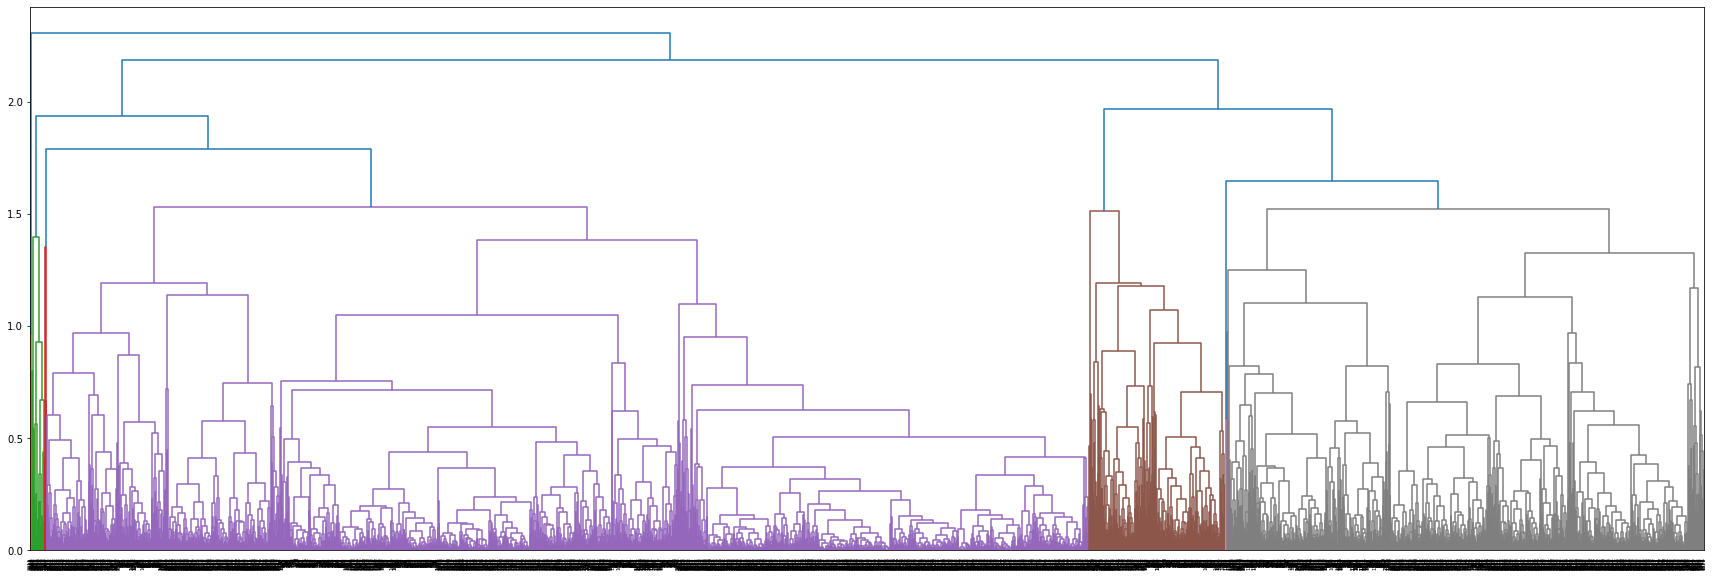

In [17]:
plt.figure(figsize=(30,10))
dendogram2=sch.dendrogram(sch.linkage(al_norm, method='complete'))

In [18]:
# create clusters
hc_norm = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [19]:
y_hc_norm=hc_norm.fit_predict(al_norm)
Cluster2=pd.DataFrame(y_hc_norm,columns=['Clusters2'])

In [20]:
Cluster2.value_counts()

Clusters2
0            2495
2            1144
1             325
4              31
3               4
dtype: int64

# Using original Values

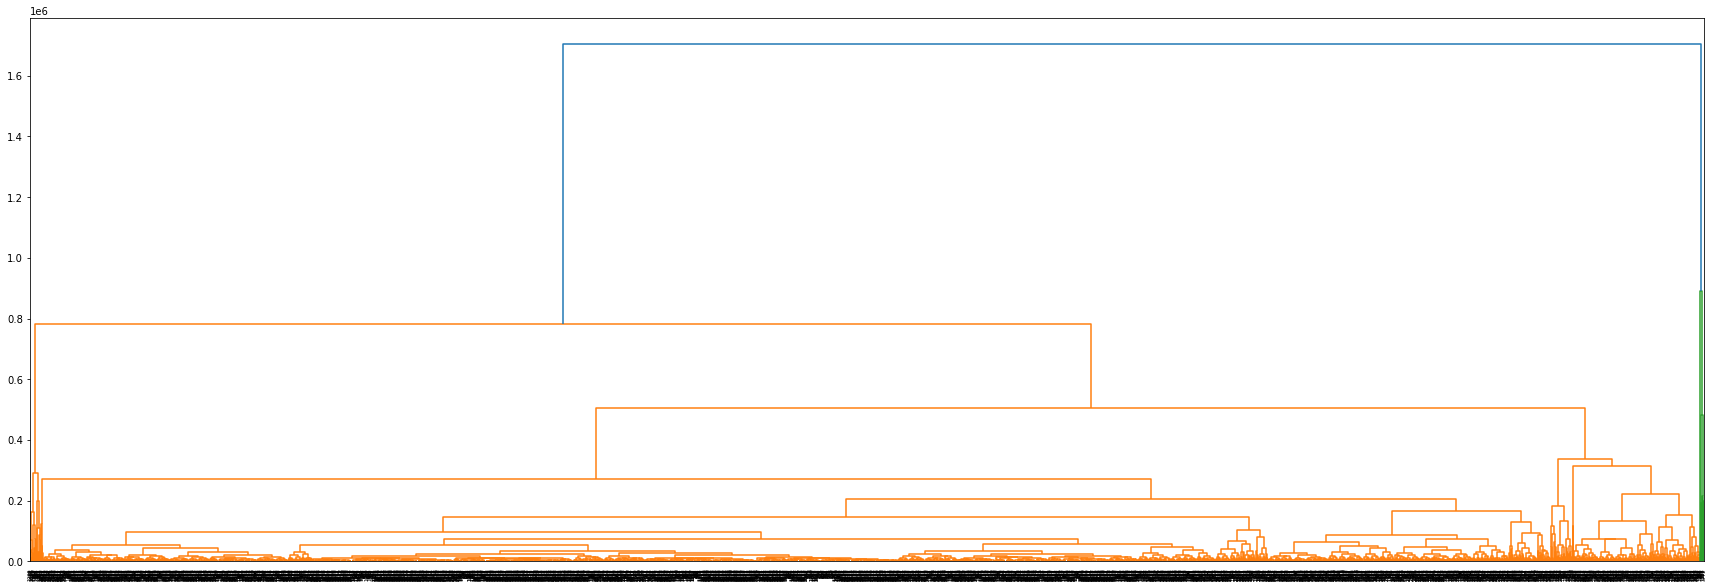

In [21]:
plt.figure(figsize=(30,10))
dendogram1=sch.dendrogram(sch.linkage(al, method='complete'))

In [22]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [23]:
y_hc=hc.fit_predict(al)
Cluster1=pd.DataFrame(y_hc,columns=['Clusters1'])

In [24]:
Cluster1.value_counts()

Clusters1
4            3607
1             356
3              26
0               9
2               1
dtype: int64

# Using Standard scaler

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss=StandardScaler()

In [27]:
al_Stand=ss.fit_transform(al)

In [28]:
df_scaled = pd.DataFrame(ss.fit_transform(al),columns = al.columns)
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919



# K means clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


__Not using standardized data because it is giving unclear value for cluster formation.__

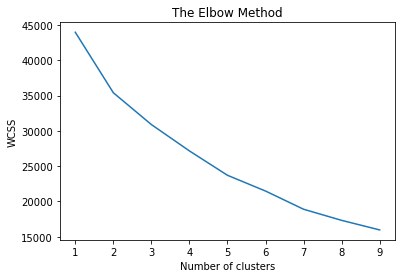

In [39]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(al_Stand)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

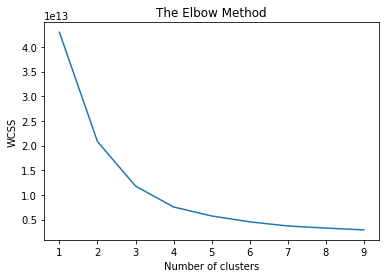

In [42]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(al)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(al)
y_kmeans

array([0, 0, 0, ..., 2, 0, 0])

In [36]:
Cluster4=pd.DataFrame(y_kmeans,columns=['Clusters4'])

In [37]:
Cluster4.value_counts()

Clusters4
0            2505
2            1045
4             342
1              88
3              19
dtype: int64

# DBSCAN

In [77]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [85]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(al_Stand)
distances,indices = nbrs.kneighbors(al_Stand)

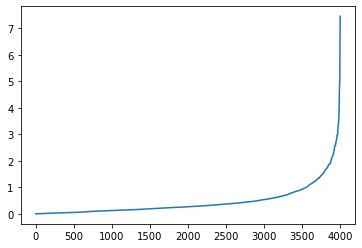

In [86]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [99]:
dbscan = DBSCAN(eps=2, min_samples=8)
dbscan.fit(al_Stand)

DBSCAN(eps=2, min_samples=8)

In [100]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [101]:
y_pred2=pd.DataFrame(dbscan.labels_,columns=['Cluster 2'])

In [102]:
y_pred2.value_counts()

Cluster 2
 0           2445
 1           1314
-1            215
 2             16
 3              9
dtype: int64